In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_cons = pd.read_excel('datasets/Actual_consumption_202001010000_202011242359.xlsx', skiprows=6,na_values='-')
df_price = pd.read_excel('datasets/Day-ahead_prices_202001010000_202011242359.xlsx', skiprows=6, na_values='-')
df_gen = pd.read_excel('datasets/Actual_generation_202012160000_202012262359.xlsx', skiprows=6, na_values='-')

In [5]:
df_cons.head()

,Date,Time of day,Total[MWh],Residual load[MWh]
0,"Jan 1, 2020",12:00 AM,10696.0,NaN
1,"Jan 1, 2020",12:15 AM,10594.0,NaN
2,"Jan 1, 2020",12:30 AM,10526.0,NaN
3,"Jan 1, 2020",12:45 AM,10520.0,NaN
4,"Jan 1, 2020",1:00 AM,10434.0,NaN


In [40]:
df_gen['Total[MWh]'] = (df_gen['Biomass[MWh]'] + 
        df_gen['Hydropower[MWh]']+
        df_gen['Wind offshore[MWh]'] +
        df_gen['Wind onshore[MWh]']+
        df_gen['Photovoltaics[MWh]']+
        df_gen['Other renewable[MWh]']+ 
        df_gen['Nuclear[MWh]']+ 
        df_gen['Fossil brown coal[MWh]']+
        df_gen['Fossil hard coal[MWh]']+ 
        df_gen['Fossil gas[MWh]']+ 
        df_gen['Hydro pumped storage[MWh]']+
        df_gen['Other conventional[MWh]'])
df_gen.head()

,Date,Time of day,Biomass[MWh],Hydropower[MWh],Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],Other renewable[MWh],Nuclear[MWh],Fossil brown coal[MWh],Fossil hard coal[MWh],Fossil gas[MWh],Hydro pumped storage[MWh],Other conventional[MWh],Total[MWh]
0,"Dec 16, 2020",12:00 AM,1131.0,347.0,766.0,1464.0,0.0,47.0,2000.0,3684.0,1846.0,2037.0,187.0,334.0,13843.0
1,"Dec 16, 2020",12:15 AM,1132.0,336.0,746.0,1415.0,0.0,47.0,2002.0,3654.0,1844.0,2018.0,61.0,331.0,13586.0
2,"Dec 16, 2020",12:30 AM,1135.0,340.0,686.0,1345.0,0.0,47.0,2001.0,3639.0,1839.0,2009.0,51.0,334.0,13426.0
3,"Dec 16, 2020",12:45 AM,1135.0,337.0,658.0,1269.0,0.0,47.0,2000.0,3643.0,1834.0,1999.0,5.0,335.0,13262.0
4,"Dec 16, 2020",1:00 AM,1132.0,344.0,667.0,1180.0,0.0,46.0,2001.0,3658.0,1817.0,1986.0,5.0,331.0,13167.0


In [41]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1056 non-null   object 
 1   Time of day                1056 non-null   object 
 2   Biomass[MWh]               1018 non-null   float64
 3   Hydropower[MWh]            1003 non-null   float64
 4   Wind offshore[MWh]         1020 non-null   float64
 5   Wind onshore[MWh]          1019 non-null   float64
 6   Photovoltaics[MWh]         1018 non-null   float64
 7   Other renewable[MWh]       1018 non-null   float64
 8   Nuclear[MWh]               1018 non-null   float64
 9   Fossil brown coal[MWh]     1019 non-null   float64
 10  Fossil hard coal[MWh]      1018 non-null   float64
 11  Fossil gas[MWh]            1019 non-null   float64
 12  Hydro pumped storage[MWh]  1019 non-null   float64
 13  Other conventional[MWh]    1018 non-null   float

In [18]:
df_price.head()

,Date,Time of day,Germany/Luxembourg[€/MWh],Denmark 1[€/MWh],Denmark 2[€/MWh],France[€/MWh],Northern Italy[€/MWh],Netherlands[€/MWh],Poland[€/MWh],Sweden 4[€/MWh],Switzerland[€/MWh],Slovenia[€/MWh],Czech Republic[€/MWh],Hungary[€/MWh],Austria[€/MWh],Germany/Austria/Luxembourg[€/MWh]
0,"Jan 1, 2020",12:00 AM,41.88,33.42,33.42,41.88,41.88,41.88,34.95,28.78,35.42,41.88,33.20,33.55,41.88,-
1,"Jan 1, 2020",1:00 AM,38.6,31.77,31.77,38.60,38.6,38.6,34.67,28.45,34.04,38.60,30.40,30.40,38.60,-
2,"Jan 1, 2020",2:00 AM,36.55,31.57,31.57,36.55,36.55,36.55,33.3,27.90,31.52,36.55,28.53,28.53,36.55,-
3,"Jan 1, 2020",3:00 AM,32.32,31.28,31.28,32.32,32.32,32.32,31.91,27.52,28.29,32.32,27.37,27.37,32.32,-
4,"Jan 1, 2020",4:00 AM,30.85,30.85,30.85,30.85,30.85,30.85,27.54,27.54,26.92,30.85,26.38,26.38,30.85,-


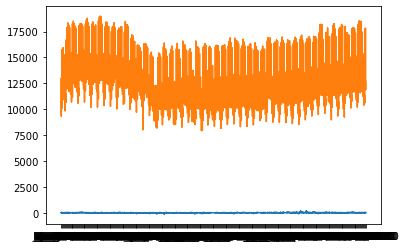

In [30]:
plt.plot('Date', 'Germany/Luxembourg[€/MWh]', data=df_price)
plt.plot('Date', 'Total[MWh]', data=df_cons)


/home/cronos/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

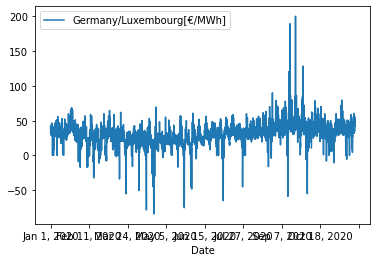

In [31]:
df_price.plot('Date', 'Germany/Luxembourg[€/MWh]')

/home/cronos/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

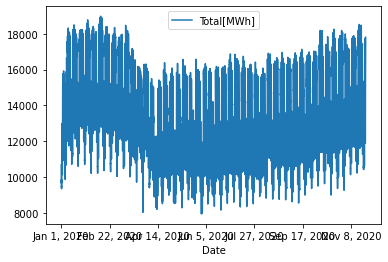

In [32]:
df_consumption.plot('Date','Total[MWh]')